<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/p031_BERT_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview


 * **BERT** : *Bidirectionnal Encoder Representation from Transformers*
 * Utile pour énormément de use cases - downstream tasks - Les GLUE tasks
 * Censé recraché un embedding de taille 768 pour chaque token
 * Apparemment y'a deux types d'inputs possible :
   1. Une sentence
   2. Une paire de sentences
 * Il y aurait des tokens spéciaux
   1. < CLS > : apparemment cela servirait d'embedding de la phrase entière
   2. < SEP > : apparemment cela servirait à distinguer les deux phrases dans le cas où l'input est une paire de phrases
 * La façon dont BERT est censé être utilisé, c'est toujours de fine tuner les poids sur ce qu'on appelle une downstream task comme de la classification


# Architecture
 * On distingue deux BERT dans le papier original du moins :
   1. BERT Base : 12 Blocks, taille de l'embedding 768, 12 tête d'attention, 110 Millions de poids à apprendre
   2. BERT Large : 24 Blocks, embedding size = 1024, 16 tête d'attention, 340 millions de parameters



# Tokenization
 * Le tokenizer de BERT est basé en partie sur l'algorithme WordPiece
 * L'intérêt de WordPiece est de diminuer la taille du vocabulaire tout en apportant plus de sens aux mots (splittés en plusieurs tokens)
 * Exemple : `My dog is cute. He likes playing` = 

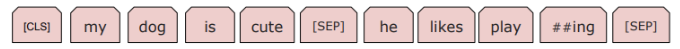

# Input du 1er block
 * Chaque token de l'input est une somme des vectors suivants :  
   1. Token embedding (768 units)
   2. Segment embedding, i.e. un vecteur de 0's ou de 1's (de taille 768)
   3. Position embedding (768 units)
   4. Longueur d'une phrase = 512
 * Special Tokens :
   1. Le token classification au début < CLS >, chargé d'encoder la phrase ou bien la paire de phrase
   2. Je ne comprends pas s'ils ont un token < START > ou < END >, si ca se trouve c'est pas nécessaire car BERT ne fait peut-être pas de génération de texte?
   3. Le token separator < SEP > permet de représenter la fin d'une phrase

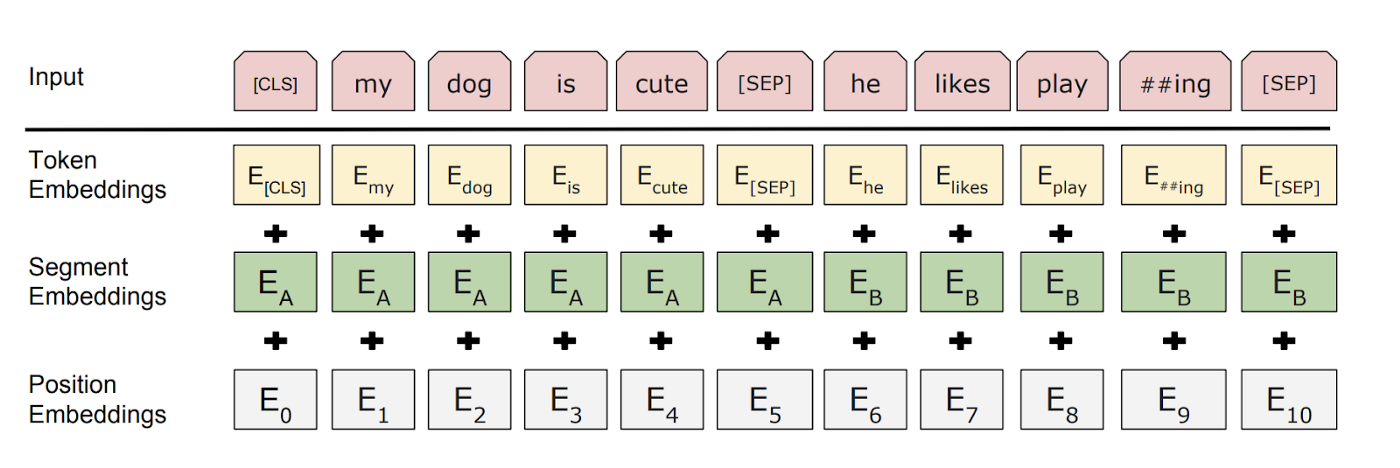

# Objectif du model
 * L'objectif du modèl est double : 
   1. **Objectif 1** : Masquer certains tokens en entrée et tenter de les prédire correctement
     * 15% des tokens modifiés, parmi eux 80% sont masqués, 10% sont remplacés par un random word, 10% restent réellement inchangés. C'est un trick des auteurs qui parait-il fonctionne
   2. **Objectif 2** : Prédire correctement si deux phrases se suivent ou non. La next sentence prediction task. L'embedding du token < CLS > passent dans un réseau simple et ressort une prédiction Oui / Non
     * En pratique, il existe 50% des paires dont les deux phrases se suivent, et 50% des paires dont les phrases n'ont pas forcément de rapport

#### Objectif 1

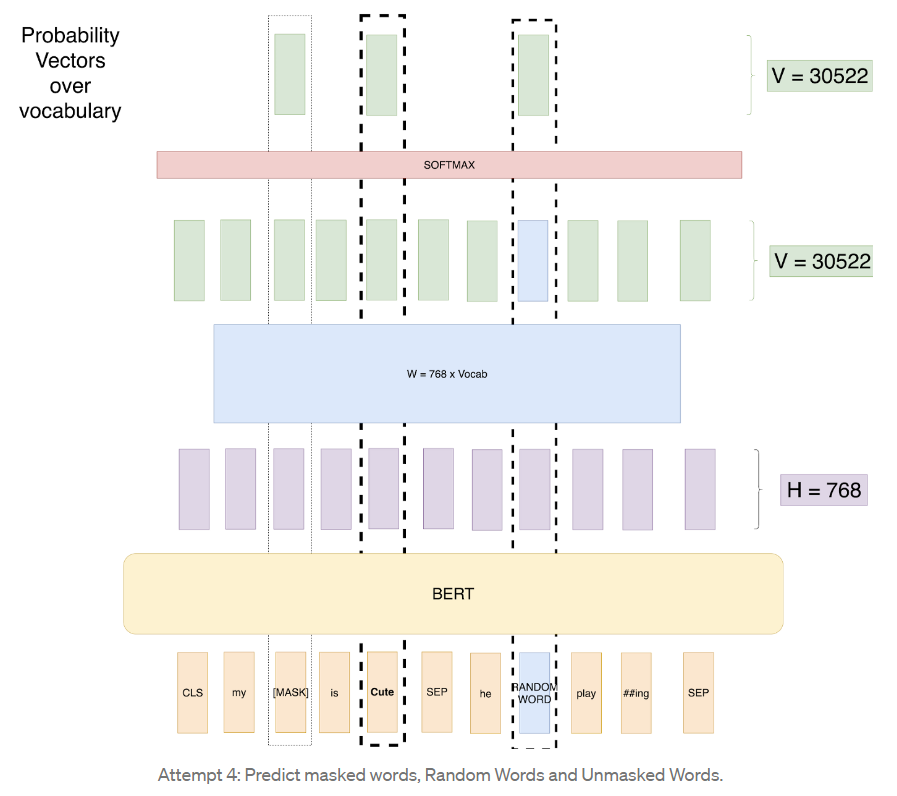


#### Objectif 2

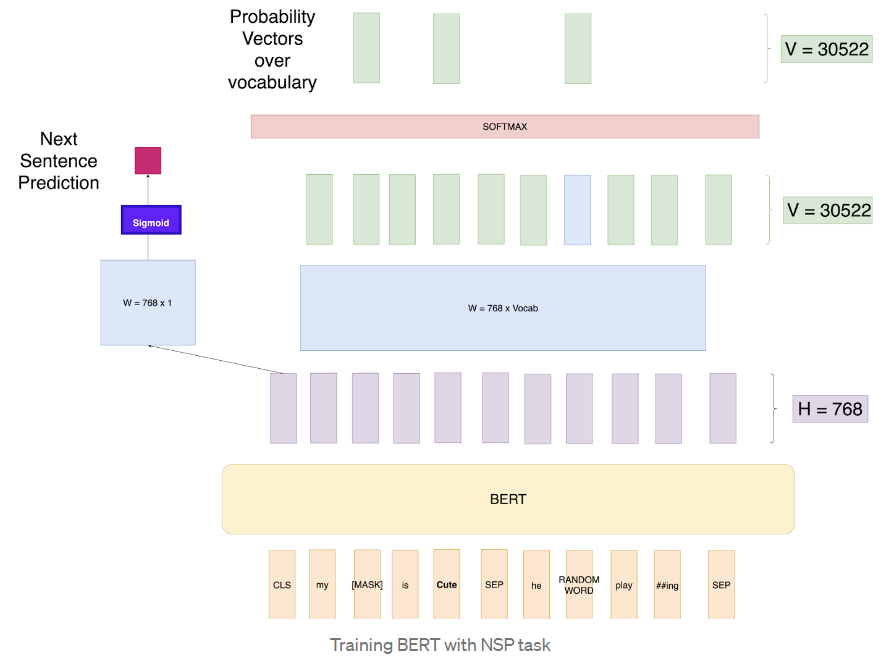

# Fine tunning for downstream tasks

BERT est utilisable pour 4 grandes tâches de NLP :
 1. **Classifier** : prédire la polarité d'une phrase ou d'un texte. Relativement simple, il suffit de rajouter un dense layer de x unités au dessus de l'embedding du token < CLS >
 2. **Cohérence d'une paire de phrases** : plus ou ou moins la même chose que le classifier, on utilise l'embedding < CLS > 
 3. **NER** : On place au dessus des embeddings de chaque token, une couche dense pour prédire le tag en question
 4. **Question-Answering** : donc là, c'est pas hyper clair, j'ai vu deux méthodes :
   * *Méthode 1* : au dessus de chaque token, on place deux couches denses en parrallèle. La première doit évaluer la probabilité que le jeton soit le jeton START. La seconde doit évaluer la probabilité qu'il s'agisse du jeton END. Evidemment, lors de la prédiction finale, il ne faut tenir compte que des jetons associés au contexte, aka la 2e phrase de la paire
   * *Méthode 2* : alors apparemment, il est question de poids permettant pour chaque paire de phrase la génération d'un vector START et d'un vector END de taille égale à l'input à savoir 512. Une fois ces deux vecteurs trouvés je ne sais comment, d'ailleurs j'ai posé la question ici sur stats.exchange : https://stats.stackexchange.com/questions/579132/how-to-compute-the-start-and-end-vector-for-bert-question-answering . Il faut faire l'opération suivante : softmax(dot product(START,Embedding)) pour obtenir les probabilités des jetons de l'input à être le jeton < START >. Il en va de même pour le jeton < END >
   * *Méthode 3* : d'après https://mccormickml.com/2020/03/10/question-answering-with-a-fine-tuned-BERT/ , il semblerait bien qu'il y ai seulement deux vectors, i.e. deux vecteurs de poids à apprendre, tout les deux de taille 512. Ces deux vecteurs multipliés par via le dot product aux outputs embeddings donneraient les logits représentant la probabilité d'être le jeton < START > et < END >
 

#### Les différentes downstream tasks de BERT

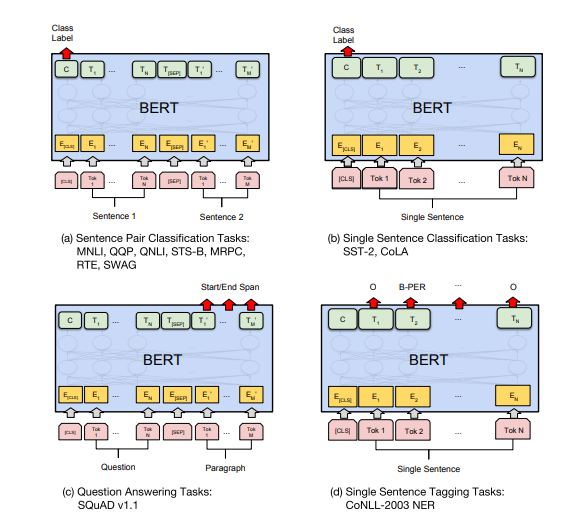
